In [1]:
%matplotlib inline
from qiskit import *

# First Quantum Circuit
## Also First Quantum Register
Register consists of two qubits, called qr
We add this register to the quantum circuit


In [2]:
qc = QuantumCircuit()
qr = QuantumRegister(2,'qreg')
qc.add_register(qr)
qc.qregs

In [ ]:
qc.draw(output = 'mpl')

# Applying Gates
##  i.e making something happen
We are telling the H Gate to act on the first qubit in the register

In [7]:
qc.h(qr[0])

We can then add a controlled NOT gate to both qubits using `cx`
This takes two arguments - the control qubit and the target qubit

In [8]:
qc.cx(qr[0],qr[1])

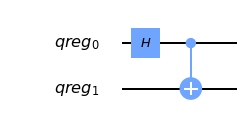

In [9]:
qc.draw(output='mpl')

# Statevector Simulation
Looking at the output of a circuit, looking at the state vector of the two qubits.

In [11]:
vector_sim = Aer.get_backend('statevector_simulator')

In [12]:
Aer.backends()

[<QasmSimulator('qasm_simulator') from AerProvider()>,
 <StatevectorSimulator('statevector_simulator') from AerProvider()>,
 <UnitarySimulator('unitary_simulator') from AerProvider()>]

In [13]:
job = execute (qc,vector_sim)

In [14]:
ket = job.result().get_statevector()
for amplitude in ket:
    print(amplitude)

(0.7071067811865476+0j)
0j
0j
(0.7071067811865475+0j)


This is the vector of a Bell State (|00> + |11>)/ sqrt(2).

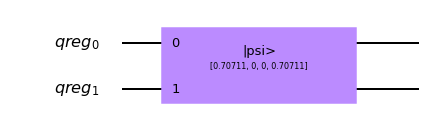

In [15]:
new_qc = QuantumCircuit(qr)
new_qc.initialize(ket,qr)
new_qc.draw(output = 'mpl')

In [19]:
cr = ClassicalRegister(2,'creg')
qc.add_register(cr)

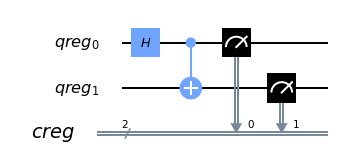

In [20]:
qc.measure(qr[0],cr[0])
qc.measure(qr[1],cr[1])

qc.draw(output='mpl')

In [21]:
emulator = Aer.get_backend('qasm_simulator')
job = execute(qc, emulator, shots = 8192)

In [24]:
hist = job.result().get_counts()
print(hist)

{'00': 4064, '11': 4128}


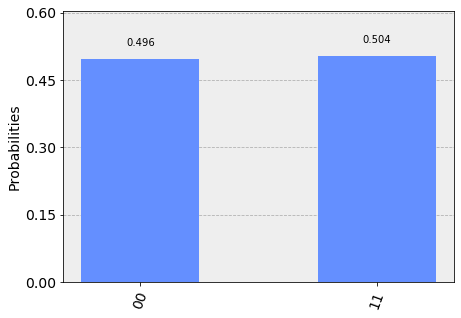

In [25]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(hist)

In [26]:
job = execute(qc,emulator, shots = 10, memory = True)
samples = job.result().get_memory()
print(samples)

['00', '00', '11', '11', '00', '11', '11', '00', '11', '11']


In [27]:
qubit = QuantumRegister(8)
bit = ClassicalRegister(8)
circuit = QuantumCircuit(qubit,bit)

circuit.x(qubit[7])
circuit.measure(qubit,bit) # all at once
result = execute(circuit,emulator,shots = 8192).result().get_counts()

In [28]:
result

{'10000000': 8192}

# Simplified Notation

In [29]:
qc = QuantumCircuit(3)

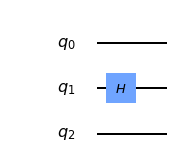

In [30]:
qc.h(1)
qc.draw(output = 'mpl')

In [31]:
qc = QuantumCircuit(2,1)

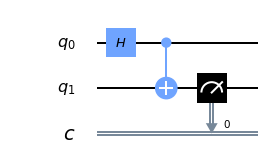

In [32]:
qc.h(0)
qc.cx(0,1)
qc.measure(1,0)
qc.draw(output = 'mpl')

# Creating Custom Gates

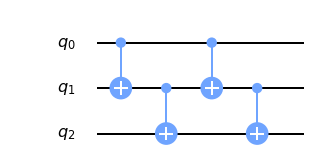

In [35]:
sub_circuit = QuantumCircuit(3, name = 'toggle_cx')
sub_circuit.cx(0,1)
sub_circuit.cx(1,2)
sub_circuit.cx(0,1)
sub_circuit.cx(1,2)

sub_circuit.draw(output= 'mpl')

In [37]:
toggle_cx = sub_circuit.to_instruction()

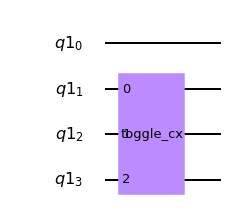

In [38]:
qr = QuantumRegister(4)
new_qc = QuantumCircuit(qr)
new_qc.append(toggle_cx, [qr[1],qr[2],qr[3]])
new_qc.draw(output= 'mpl')

# On Real Quantum Hardware

In [39]:
IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [40]:
provider = IBMQ.get_provider(hub = 'ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [41]:
for backend in provider.backends():
    print(backend.status())

BackendStatus(backend_name='ibmq_qasm_simulator', backend_version='0.0.0', operational=True, pending_jobs=15, status_msg='active')
BackendStatus(backend_name='ibmqx2', backend_version='2.0.0', operational=True, pending_jobs=212, status_msg='active')
BackendStatus(backend_name='ibmq_16_melbourne', backend_version='1.0.0', operational=True, pending_jobs=3, status_msg='active')
BackendStatus(backend_name='ibmq_vigo', backend_version='1.0.1', operational=True, pending_jobs=1, status_msg='active')
BackendStatus(backend_name='ibmq_ourense', backend_version='1.0.1', operational=True, pending_jobs=2, status_msg='active')


In [42]:
real_device = provider.get_backend('ibmq_16_melbourne')

In [44]:
properties = real_device.properties()
coupling_map = real_device.configuration().coupling_map

In [46]:
from qiskit.providers.aer import noise
noise_model = noise.device.basic_device_noise_model(properties)

In [47]:
qc = QuantumCircuit(2,2)
qc.x(1)
qc.measure(0,0)
qc.measure(1,1)

In [48]:
job = execute(qc,emulator, shots = 1024, noise_model = noise_model,
             coupling_map = coupling_map,
             basis_gates = noise_model.basis_gates)

job.result().get_counts()

{'00': 72, '11': 19, '10': 932, '01': 1}